In [1]:

'''REQUIRED LIBRARIES'''
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np


## Check if GPU accelaration is running (applies for Windows users with Nvidia card)

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2024-03-08 22:05:16.169385: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 22:05:16.169493: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 22:05:16.215715: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-08 22:05:16.316588: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-08 22:05:17.930806: W tensorflow/compiler/tf2

Num GPUs Available:  1


2024-03-08 22:05:20.682581: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-08 22:05:20.851235: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-08 22:05:20.851296: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


## Load the Data

In [3]:
data_path = '../raw_data/archive/antic_chairs/3d015004-c2a5-407e-8e7b-6895270b6087_100x100.jpg'

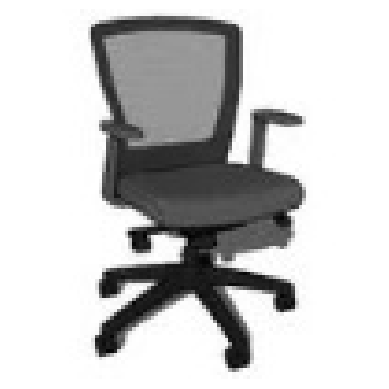

In [4]:
image = mpimg.imread(data_path)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()

In [5]:
image.shape

(100, 100, 3)

In [6]:
def load_images_from_folder(filename : str):
    '''
    inputs folder location as string and outputs the containing images as an array
    '''

    # Set the path to the folder containing the images
    data_folder = filename

    # Initialize an empty list to store the images
    images = []

    # Iterate over the files in the data folder
    for filename in os.listdir(data_folder):
        # Check if the file is an image
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Load the image
            img_path = os.path.join(data_folder, filename)
            img = Image.open(img_path)
            # Resize the image to (100, 100)
            img = img.resize((100, 100))
            # Convert the image to RGB if it's not already in RGB format
            if img.mode != 'RGB':
                img = img.convert('RGB')
            # Append the image to the list
            images.append(img)

    # Convert the list of images to an array
    images_array = np.array([np.array(img) for img in images])

    return images_array


In [7]:
train_path = '../raw_data/archive/antic_chairs'
test_path = '../raw_data/archive/antic_chairs_test'

In [8]:
train_images = load_images_from_folder(train_path)
test_images = load_images_from_folder(test_path)

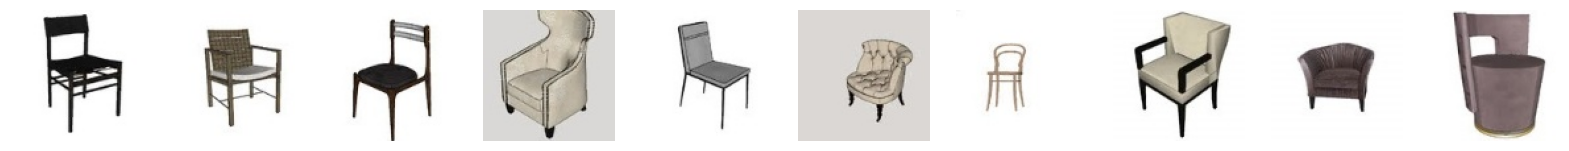

In [9]:
# Display 10 images horizontally next to each other
fig, axes = plt.subplots(1, 10, figsize=(20, 2))

# Iterate over the first 10 images and display them
for i in range(10):
    axes[i].imshow(train_images[i])
    axes[i].axis('off')

plt.show()

In [10]:
train_images.shape #check the shape of the train set

(1303, 100, 100, 3)

## Preprocessing the images

In [11]:
# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

## Auto encoder model

### Kitt model

#### check for optimum latent space dimension

In [23]:
latent_dimensions = list(range(2,320,10))

test_errors = []
for latent_dimension in latent_dimensions:
    print(" ")
    print("-"*80)
    print(f"Running the autoencoder with latent_dimension = {latent_dimension}")
    print("-"*80)
    encoder = build_encoder(latent_dimension=latent_dimension)
    decoder = build_decoder(latent_dimension=latent_dimension)
    autoencoder = build_autoencoder(encoder, decoder)
    autoencoder.compile(loss='mse',optimizer='nadam')
    autoencoder.fit(train_images, train_images, epochs=20, batch_size=32)
    error = autoencoder.evaluate(test_images, test_images)
    test_errors.append(error)

 
--------------------------------------------------------------------------------
Running the autoencoder with latent_dimension = 2
--------------------------------------------------------------------------------
Epoch 1/20
41/41 [==============================] - 5s 27ms/step - loss: 0.6951
Epoch 2/20
41/41 [==============================] - 1s 13ms/step - loss: 0.3834
Epoch 3/20
41/41 [==============================] - 0s 12ms/step - loss: 0.0980
Epoch 4/20
41/41 [==============================] - 1s 12ms/step - loss: 0.0481
Epoch 5/20
41/41 [==============================] - 1s 13ms/step - loss: 0.0414
Epoch 6/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0389
Epoch 7/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0382
Epoch 8/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0374
Epoch 9/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0370
Epoch 10/20
41/41 [==============================] - 1s 14ms/step 

41/41 [==============================] - 1s 14ms/step - loss: 0.0489
Epoch 7/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0459
Epoch 8/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0428
Epoch 9/20
41/41 [==============================] - 1s 13ms/step - loss: 0.0390
Epoch 10/20
41/41 [==============================] - 1s 15ms/step - loss: 0.0365
Epoch 11/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0322
Epoch 12/20
41/41 [==============================] - 1s 15ms/step - loss: 0.0291
Epoch 13/20
41/41 [==============================] - 1s 13ms/step - loss: 0.0272
Epoch 14/20
41/41 [==============================] - 1s 13ms/step - loss: 0.0261
Epoch 15/20
41/41 [==============================] - 1s 13ms/step - loss: 0.0253
Epoch 16/20
41/41 [==============================] - 1s 13ms/step - loss: 0.0248
Epoch 17/20
41/41 [==============================] - 1s 13ms/step - loss: 0.0243
Epoch 18/20
41/41 [========================

41/41 [==============================] - 1s 16ms/step - loss: 0.0487
Epoch 14/20
41/41 [==============================] - 1s 15ms/step - loss: 0.0455
Epoch 15/20
41/41 [==============================] - 1s 15ms/step - loss: 0.0424
Epoch 16/20
41/41 [==============================] - 1s 16ms/step - loss: 0.0416
Epoch 17/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0405
Epoch 18/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0399
Epoch 19/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0369
Epoch 20/20
4/4 [==============================] - 0s 6ms/step - loss: 0.0324
 
--------------------------------------------------------------------------------
Running the autoencoder with latent_dimension = 92
--------------------------------------------------------------------------------
Epoch 1/20
41/41 [==============================] - 4s 21ms/step - loss: 0.5818
Epoch 2/20
41/41 [==============================] - 1s 15ms/step - loss:

4/4 [==============================] - 0s 6ms/step - loss: 0.0237
 
--------------------------------------------------------------------------------
Running the autoencoder with latent_dimension = 132
--------------------------------------------------------------------------------
Epoch 1/20
41/41 [==============================] - 5s 24ms/step - loss: 0.5602
Epoch 2/20
41/41 [==============================] - 1s 15ms/step - loss: 0.2793
Epoch 3/20
41/41 [==============================] - 1s 18ms/step - loss: 0.1184
Epoch 4/20
41/41 [==============================] - 1s 16ms/step - loss: 0.0735
Epoch 5/20
41/41 [==============================] - 1s 15ms/step - loss: 0.0597
Epoch 6/20
41/41 [==============================] - 1s 15ms/step - loss: 0.0549
Epoch 7/20
41/41 [==============================] - 1s 17ms/step - loss: 0.0529
Epoch 8/20
41/41 [==============================] - 1s 15ms/step - loss: 0.0516
Epoch 9/20
41/41 [==============================] - 1s 17ms/step - loss: 0.050

41/41 [==============================] - 1s 14ms/step - loss: 0.0826
Epoch 5/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0646
Epoch 6/20
41/41 [==============================] - 1s 16ms/step - loss: 0.0577
Epoch 7/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0544
Epoch 8/20
41/41 [==============================] - 1s 15ms/step - loss: 0.0525
Epoch 9/20
41/41 [==============================] - 1s 12ms/step - loss: 0.0513
Epoch 10/20
41/41 [==============================] - 0s 12ms/step - loss: 0.0503
Epoch 11/20
41/41 [==============================] - 1s 13ms/step - loss: 0.0477
Epoch 12/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0441
Epoch 13/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0434
Epoch 14/20
41/41 [==============================] - 1s 15ms/step - loss: 0.0417
Epoch 15/20
41/41 [==============================] - 1s 15ms/step - loss: 0.0397
Epoch 16/20
41/41 [==========================

41/41 [==============================] - 1s 13ms/step - loss: 0.0498
Epoch 12/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0498
Epoch 13/20
41/41 [==============================] - 1s 15ms/step - loss: 0.0496
Epoch 14/20
41/41 [==============================] - 1s 12ms/step - loss: 0.0495
Epoch 15/20
41/41 [==============================] - 1s 13ms/step - loss: 0.0488
Epoch 16/20
41/41 [==============================] - 1s 13ms/step - loss: 0.0438
Epoch 17/20
41/41 [==============================] - 1s 15ms/step - loss: 0.0412
Epoch 18/20
41/41 [==============================] - 1s 15ms/step - loss: 0.0390
Epoch 19/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0359
Epoch 20/20
4/4 [==============================] - 0s 6ms/step - loss: 0.0355
 
--------------------------------------------------------------------------------
Running the autoencoder with latent_dimension = 222
----------------------------------------------------------------------

41/41 [==============================] - 1s 15ms/step - loss: 0.0208
Epoch 19/20
41/41 [==============================] - 1s 15ms/step - loss: 0.0196
Epoch 20/20
4/4 [==============================] - 0s 5ms/step - loss: 0.0214
 
--------------------------------------------------------------------------------
Running the autoencoder with latent_dimension = 262
--------------------------------------------------------------------------------
Epoch 1/20
41/41 [==============================] - 4s 22ms/step - loss: 0.5846
Epoch 2/20
41/41 [==============================] - 1s 16ms/step - loss: 0.3266
Epoch 3/20
41/41 [==============================] - 1s 21ms/step - loss: 0.1315
Epoch 4/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0753
Epoch 5/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0625
Epoch 6/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0570
Epoch 7/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0

41/41 [==============================] - 1s 18ms/step - loss: 0.2776
Epoch 3/20
41/41 [==============================] - 1s 17ms/step - loss: 0.1345
Epoch 4/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0850
Epoch 5/20
41/41 [==============================] - 1s 15ms/step - loss: 0.0678
Epoch 6/20
41/41 [==============================] - 1s 15ms/step - loss: 0.0594
Epoch 7/20
41/41 [==============================] - 1s 16ms/step - loss: 0.0556
Epoch 8/20
41/41 [==============================] - 1s 16ms/step - loss: 0.0534
Epoch 9/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0521
Epoch 10/20
41/41 [==============================] - 1s 16ms/step - loss: 0.0514
Epoch 11/20
41/41 [==============================] - 1s 18ms/step - loss: 0.0510
Epoch 12/20
41/41 [==============================] - 1s 18ms/step - loss: 0.0506
Epoch 13/20
41/41 [==============================] - 1s 19ms/step - loss: 0.0504
Epoch 14/20
41/41 [============================

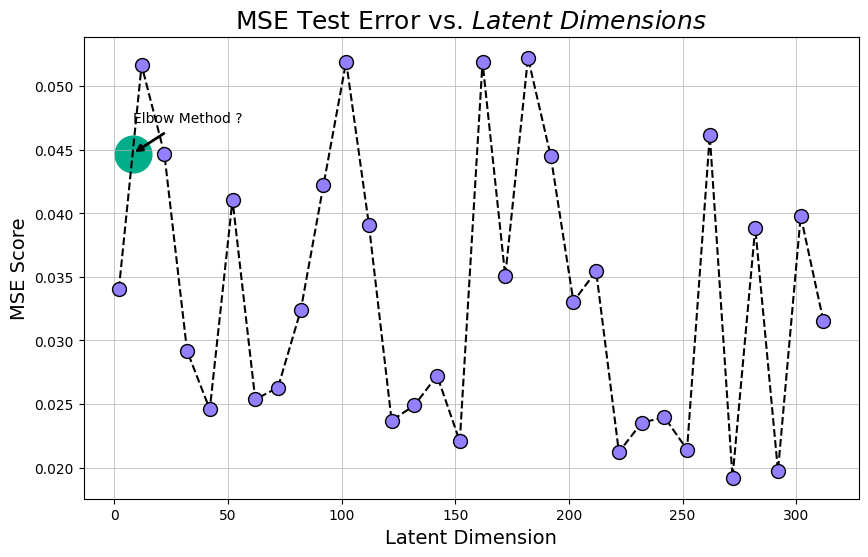

In [24]:
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(latent_dimensions,
            test_errors,
            color='black',
            linestyle='dashed',
            marker='o',
            markerfacecolor='#947FFF',
            markersize=10)
    # more
    ax.set_title('MSE Test Error vs. $Latent$ $Dimensions$', fontsize = 18)
    ax.set_xlabel('Latent Dimension', fontsize = 14)
    ax.set_ylabel('MSE Score', fontsize = 14)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)

    # focusing
    ax.scatter(8,test_errors[2],c='#00ad8b',s=700)

    # annotate
    ax.annotate("Elbow Method ?",
               xy=(8,test_errors[2]),
                xytext=(8+0.25,test_errors[2]+0.0025),
                arrowprops=dict(arrowstyle='-|>',
                                fc="k",
                                ec="k",
                                lw=2),
                bbox=dict(pad=5, facecolor="none", edgecolor="none")
               )


    plt.show();

#### Building the model

In [27]:
'''
KITT MODEL
'''


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def build_encoder(latent_dimension):
    '''returns an encoder model, of output_shape equals to latent_dimension'''
    encoder = Sequential()

    encoder.add(Conv2D(16, (3,3), input_shape=(100, 100, 3), activation='relu'))
    encoder.add(MaxPooling2D(2))

    encoder.add(Conv2D(16, (3, 3), activation='relu'))
    encoder.add(MaxPooling2D(2))

    encoder.add(Conv2D(8, (3, 3), activation='relu'))
    encoder.add(MaxPooling2D(2))

    encoder.add(Flatten())
    encoder.add(Dense(latent_dimension, activation='tanh'))

    return encoder

In [28]:
encoder = build_encoder(270)

In [29]:
encoder.summary()

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_99 (Conv2D)          (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_99 (MaxPooli  (None, 49, 49, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_100 (Conv2D)         (None, 47, 47, 16)        2320      
                                                                 
 max_pooling2d_100 (MaxPool  (None, 23, 23, 16)        0         
 ing2D)                                                          
                                                                 
 conv2d_101 (Conv2D)         (None, 21, 21, 8)         1160      
                                                                 
 max_pooling2d_101 (MaxPool  (None, 10, 10, 8)       

In [30]:
from tensorflow.keras.layers import Reshape, Conv2DTranspose

def build_decoder(latent_dimension):

    decoder = Sequential()

    decoder.add(Dense(25*25*8,input_shape=(latent_dimension,),activation='tanh'))
    decoder.add(Reshape([25,25,8]))
    decoder.add(Conv2DTranspose(16,(2,2),strides=(2, 2),padding='same',activation='relu'))
    decoder.add(Conv2DTranspose(3,(2,2),strides=(2,2),padding='same',activation='relu'))

    return decoder

In [31]:
decoder = build_decoder(270)

In [32]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input

def build_autoencoder(encoder, decoder):
    inp = Input((100, 100,3))
    encoded = encoder(inp)
    decoded = decoder(encoded)
    autoencoder = Model(inp, decoded)
    return autoencoder

In [33]:
autoencoder = build_autoencoder(encoder,decoder)
autoencoder.summary()

Model: "model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 sequential_66 (Sequential)  (None, 270)               220198    
                                                                 
 sequential_67 (Sequential)  (None, 100, 100, 3)       1355723   
                                                                 
Total params: 1575921 (6.01 MB)
Trainable params: 1575921 (6.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
autoencoder.compile(loss='mse',optimizer='nadam')

In [35]:
autoencoder.fit(train_images,train_images,epochs=30,batch_size=16)

Epoch 1/30
82/82 [==============================] - 4s 15ms/step - loss: 0.3615
Epoch 2/30
82/82 [==============================] - 1s 13ms/step - loss: 0.0953
Epoch 3/30
82/82 [==============================] - 1s 12ms/step - loss: 0.0603
Epoch 4/30
82/82 [==============================] - 1s 12ms/step - loss: 0.0538
Epoch 5/30
82/82 [==============================] - 1s 11ms/step - loss: 0.0520
Epoch 6/30
82/82 [==============================] - 1s 11ms/step - loss: 0.0514
Epoch 7/30
82/82 [==============================] - 1s 11ms/step - loss: 0.0507
Epoch 8/30
82/82 [==============================] - 1s 12ms/step - loss: 0.0487
Epoch 9/30
82/82 [==============================] - 1s 12ms/step - loss: 0.0430
Epoch 10/30
82/82 [==============================] - 1s 11ms/step - loss: 0.0428
Epoch 11/30
82/82 [==============================] - 1s 11ms/step - loss: 0.0417
Epoch 12/30
82/82 [==============================] - 1s 12ms/step - loss: 0.0404
Epoch 13/30
82/82 [==================

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


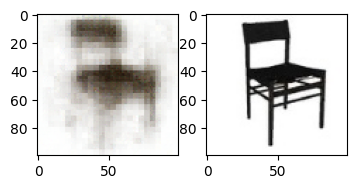

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


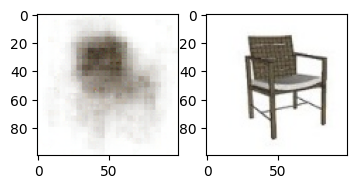

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


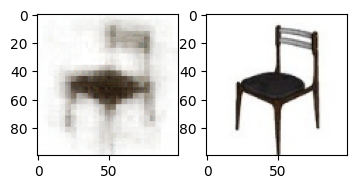

In [36]:
prediction = autoencoder.predict(train_images, verbose=0, batch_size=100)# you can now display an image to see it is reconstructed well

for i in range(3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,2))
    ax1.imshow(prediction[i].reshape(100,100,3))
    ax2.imshow(train_images[i].reshape(100,100,3))
    plt.show()

In [37]:
im_encoded = encoder.predict(train_images,verbose=1)

41/41 [==============================] - 0s 3ms/step


----------------------------------------------------------------

### CHAT GTP Model

#### Building the model

---------------------------

In [ ]:
'''
GHATGPT MODEL
'''


# Define the autoencoder model
input_img = Input(shape=(100, 100, 3))


# Encoder layers
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


# Decoder layers
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Compile the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(train_images, train_images,
                epochs=50,
                batch_size=10,
                shuffle=True)

In [43]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

def build_encoder(input_shape):
    input_img = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)
    return Model(input_img, encoded)

def build_decoder(encoded_shape):
    input_encoded = Input(shape=encoded_shape)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='valid')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # Output should match input shape
    return Model(input_encoded, decoded)


# Define input shape
input_shape = (100, 100, 3)

# Build encoder and decoder
encoder = build_encoder(input_shape)
decoder = build_decoder(encoder.output_shape[1:])

# Combine encoder and decoder into autoencoder
input_img = Input(shape=input_shape)
encoded = encoder(input_img)
decoded = decoder(encoded)
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(train_images, train_images, epochs=10, batch_size=32, shuffle=True)


Epoch 1/10
41/41 [==============================] - 8s 69ms/step - loss: 0.4043
Epoch 2/10
41/41 [==============================] - 1s 28ms/step - loss: 0.2996
Epoch 3/10
41/41 [==============================] - 1s 27ms/step - loss: 0.2911
Epoch 4/10
41/41 [==============================] - 1s 27ms/step - loss: 0.2712
Epoch 5/10
41/41 [==============================] - 1s 29ms/step - loss: 0.2599
Epoch 6/10
41/41 [==============================] - 1s 28ms/step - loss: 0.2541
Epoch 7/10
41/41 [==============================] - 1s 27ms/step - loss: 0.2522
Epoch 8/10
41/41 [==============================] - 1s 27ms/step - loss: 0.2568
Epoch 9/10
41/41 [==============================] - 1s 28ms/step - loss: 0.2509
Epoch 10/10
41/41 [==============================] - 1s 27ms/step - loss: 0.2549


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Define input shape
input_shape = (100, 100, 3)

# Define the autoencoder architecture
input_img = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (12, 12, 128)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='valid')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Compile the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Load and preprocess your face image data (e.g., using ImageDataGenerator)

# Train the autoencoder
autoencoder.fit(train_images, train_images, epochs=10, batch_size=32, shuffle=True)


1/1 [==============================] - 0s 439ms/step


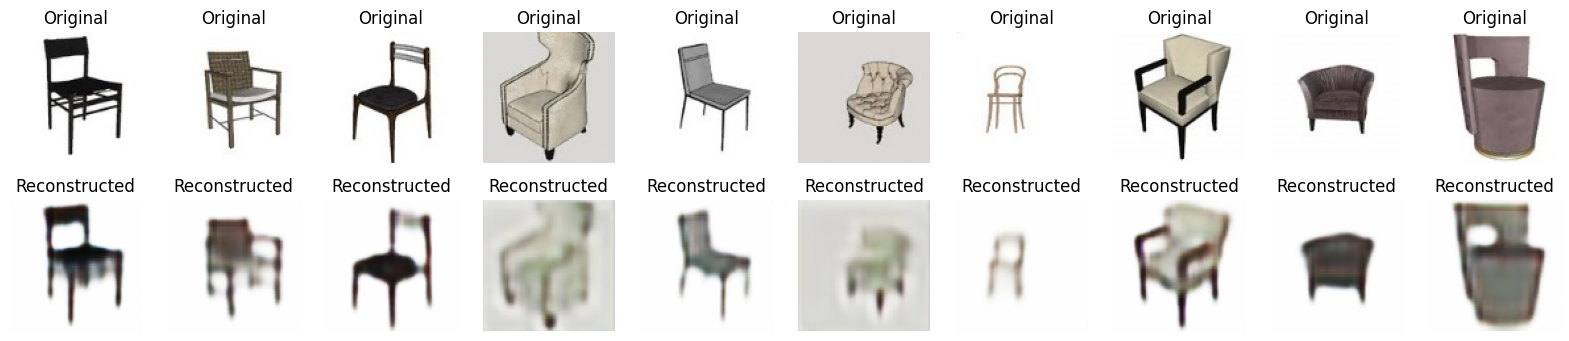

In [44]:
# Generate new faces
num_faces = 10
encoded_imgs = encoder.predict(train_images[:num_faces])
decoded_imgs = decoder.predict(encoded_imgs)

# Display original and reconstructed faces
plt.figure(figsize=(20, 4))
for i in range(num_faces):
    # Original images
    plt.subplot(2, num_faces, i + 1)
    plt.imshow(train_images[i])
    plt.title('Original')
    plt.axis('off')

    # Reconstructed images
    plt.subplot(2, num_faces, i + 1 + num_faces)
    plt.imshow(decoded_imgs[i])
    plt.title('Reconstructed')
    plt.axis('off')
plt.show()

## Creating interpolations

1/1 [==============================] - 0s 15ms/step


(-0.5, 99.5, 99.5, -0.5)

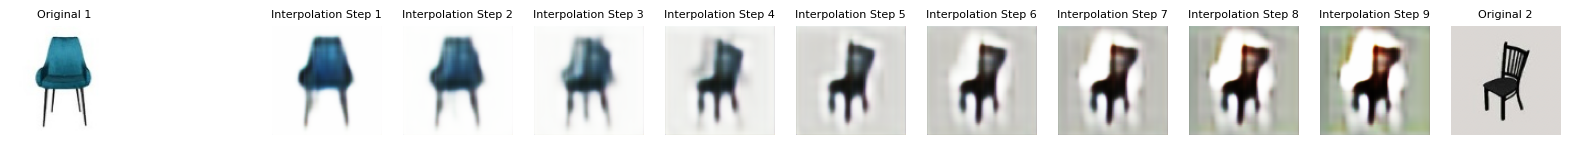

In [45]:
# Choose two images from the dataset
image1 = train_images[371]  # Assuming x_train is your dataset
image2 = train_images[1014]

# Encode the images
encoded_image1 = encoder.predict(np.array([image1]))
encoded_image2 = encoder.predict(np.array([image2]))

# Interpolate between the encodings
interpolations = []
for i in range(10):  # 5 steps of interpolation
    alpha = i / 4.0
    interpolated_encoding = alpha * encoded_image1 + (1 - alpha) * encoded_image2
    interpolations.append(interpolated_encoding)

# Decode the interpolated encodings
decoded_interpolations = []
for encoding in interpolations:
    decoded_interpolations.append(decoder.predict(encoding))

# Visualize the reconstructed images of the interpolations
plt.figure(figsize=(20, 10))
# for i, reconstructed_image in enumerate(decoded_interpolations):
#     plt.subplot(1, 5, i + 1)
#     plt.imshow(reconstructed_image.squeeze())
#     plt.title(f'Interpolation Step {i + 1}')
#     plt.axis('off')
# plt.show()

# Plot the first original image
plt.subplot(1, 12, 1)
plt.imshow(image2,)
plt.title('Original 1',fontsize=8)
plt.axis('off')

# Plot the reconstructed images of the interpolations
for i, reconstructed_image in enumerate(decoded_interpolations):
    plt.subplot(1, 12, i + 3)
    plt.imshow(reconstructed_image.squeeze())
    plt.title(f'Interpolation Step {i + 1}',fontsize=8)
    plt.axis('off')

# Plot the second original image
plt.subplot(1, 12, 12)
plt.imshow(image1)
plt.title('Original 2',fontsize=8)
plt.axis('off')


## visualize latent space with UMAP

In [46]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D
import umap

# Obtain encoded representations
encoded_data = encoder.predict(train_images)



# Flatten the encoded data
# Reshape the encoded data to flatten each encoded representation
encoded_data_flat = encoded_data.reshape((encoded_data.shape[0], -1))

# Apply UMAP to reduce dimensionality to 3D
umap_reducer = umap.UMAP(n_components=3, random_state=42)
latent_3d = umap_reducer.fit_transform(encoded_data_flat)


41/41 [==============================] - 0s 10ms/step


/home/alexp/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [48]:
import plotly.graph_objs as go


In [49]:
# Extract image indices for each point in the latent space
image_indices = np.arange(len(train_images))

# Create an interactive 3D scatter plot with Plotly
scatter = go.Scatter3d(
    x=latent_3d[:, 0],
    y=latent_3d[:, 1],
    z=latent_3d[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    ),
    hoverinfo='text',
    text=image_indices  # Show image indices on hover
)

layout = go.Layout(
    scene=dict(
        xaxis=dict(title='X Label'),
        yaxis=dict(title='Y Label'),
        zaxis=dict(title='Z Label')
    ),
    title='UMAP 3D Visualization of Latent Space'
)

fig = go.Figure(data=[scatter], layout=layout)
fig.show()

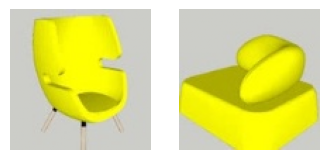

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(4, 2))


axes[0].imshow(train_images[886])
axes[0].axis('off')

axes[1].imshow(train_images[1030])
axes[1].axis('off')

plt.show()